<a href="https://colab.research.google.com/github/vaishnavi-3969/AI-Hackfest/blob/main/Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.models import Sequential
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random
import pandas as pd

In [ ]:
np.random.seed(0)

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 10.13 MiB/s, done.


In [ ]:
with open('german-traffic-signs/train.p','rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data = pickle.load(f)  
with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)

In [ ]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"

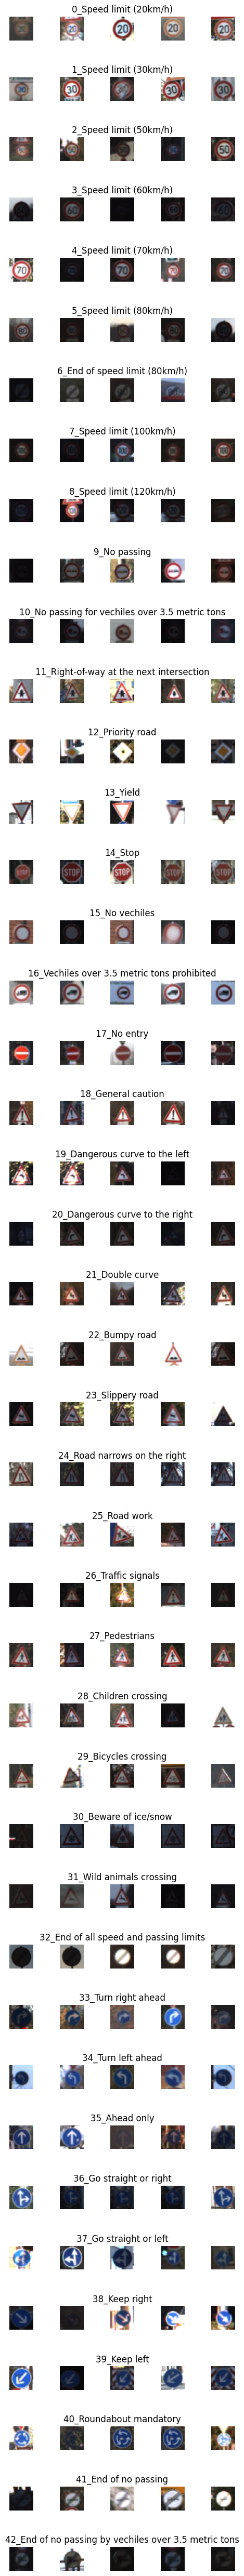

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)-1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["SignName"])
            num_of_samples.append(len(x_selected))
            

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

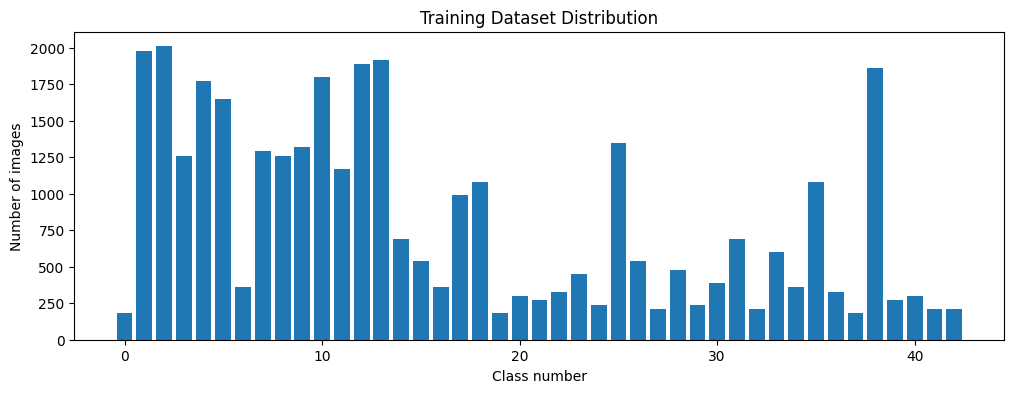

In [ ]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Training Dataset Distribution")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


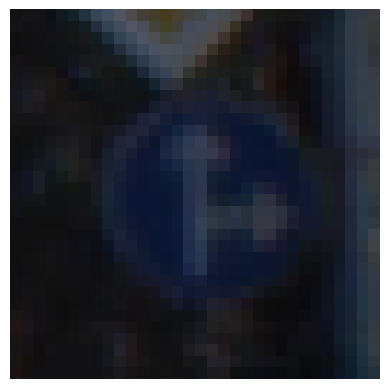

In [ ]:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [ ]:
def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

(32, 32)


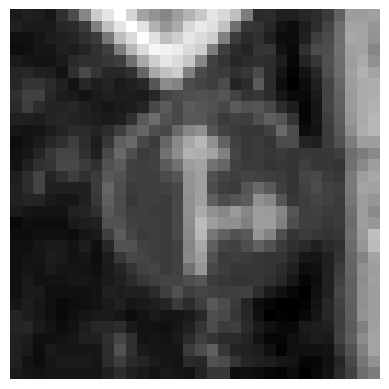

In [ ]:
img = grayscale(X_train[1000])
plt.imshow(img, cmap = 'gray')
print(img.shape)

In [ ]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


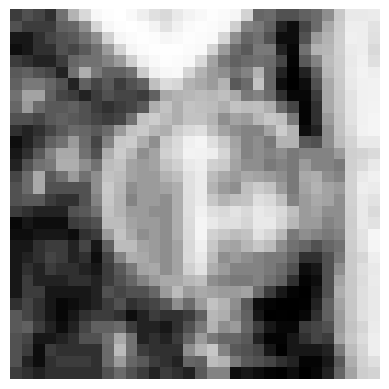

In [ ]:
img = equalize(img)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
print(img.shape)

In [ ]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

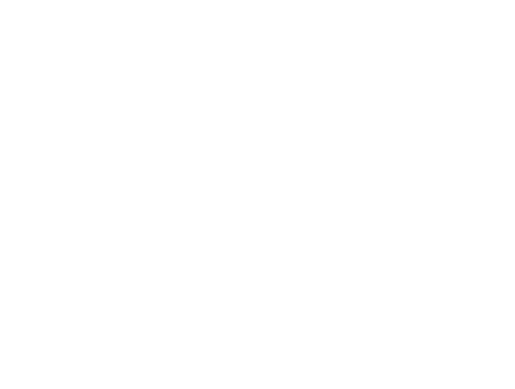

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1,
                  height_shift_range = 0.1,
                   zoom_range = 0.2,
                  shear_range = 0.1,
                  rotation_range = 10)

datagen.fit(X_train)

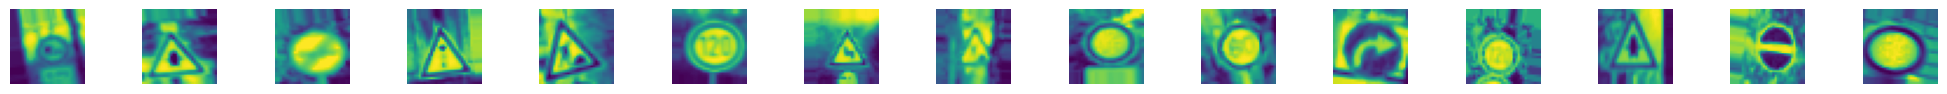

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [ ]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
def neural_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
model = neural_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch =int( np.ceil(X_train.shape[0] / 50) ), epochs = 20, validation_data =(X_val, y_val), shuffle = 1)

<ipython-input-25-d8db40caec14>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch =int( np.ceil(X_train.shape[0] / 50) ), epochs = 20, validation_data =(X_val, y_val), shuffle = 1)


Epoch 1/20
696/696 [==============================] - 440s 629ms/step - loss: 1.8289 - accuracy: 0.4824 - val_loss: 0.3249 - val_accuracy: 0.8850
Epoch 2/20
696/696 [==============================] - 448s 644ms/step - loss: 0.5246 - accuracy: 0.8366 - val_loss: 0.1178 - val_accuracy: 0.9644
Epoch 3/20
696/696 [==============================] - 438s 630ms/step - loss: 0.3275 - accuracy: 0.8976 - val_loss: 0.0729 - val_accuracy: 0.9794
Epoch 4/20
696/696 [==============================] - 432s 621ms/step - loss: 0.2401 - accuracy: 0.9264 - val_loss: 0.0500 - val_accuracy: 0.9859
Epoch 5/20
696/696 [==============================] - 423s 608ms/step - loss: 0.1990 - accuracy: 0.9373 - val_loss: 0.0440 - val_accuracy: 0.9889
Epoch 6/20
696/696 [==============================] - 419s 601ms/step - loss: 0.1625 - accuracy: 0.9493 - val_loss: 0.0489 - val_accuracy: 0.9855
Epoch 7/20
696/696 [==============================] - 426s 612ms/step - loss: 0.1471 - accuracy: 0.9552 - val_loss: 0.0482 -

In [ ]:
model.save('signs.h5')

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

395/395 [==============================] - 37s 95ms/step - loss: 0.1042 - accuracy: 0.9749
Test Score 0.10415387898683548
Test Accuracy 0.974901020526886


In [ ]:
import requests
from PIL import Image
url = 'https://media.istockphoto.com/id/467751164/photo/wild-animals-crossing-in-austria.jpg?s=612x612&w=0&k=20&c=WjUoo8s21L0zEpHvjuyM_uhdSW9of4HFje-TotmRrzc='
r = requests.get(url, stream=True)
image = Image.open(r.raw)
plt.axis('off')
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [ ]:
img = np.asarray(image)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 266ms/step


array([[8.4099647e-06, 4.2067568e-06, 2.0962706e-04, 3.3221336e-04,
        2.7485314e-05, 7.3272087e-05, 4.5969881e-07, 3.0620429e-06,
        5.1091779e-06, 2.2539806e-03, 1.1754538e-04, 3.4925601e-04,
        2.3222526e-06, 4.1690987e-06, 1.9948449e-07, 1.8628292e-05,
        3.0642072e-06, 1.9591914e-06, 6.0639530e-04, 1.3786623e-01,
        4.3613207e-01, 1.8931348e-02, 2.0077826e-02, 7.5931147e-02,
        1.6689871e-04, 2.1921931e-02, 1.8372679e-03, 6.7267241e-04,
        7.0311158e-04, 1.5870702e-03, 2.7490612e-03, 2.7685288e-01,
        4.0203677e-08, 8.8820195e-07, 7.5487478e-05, 5.4057233e-07,
        7.9459818e-07, 1.2070765e-05, 3.3618562e-04, 6.6694571e-05,
        5.0596205e-05, 4.8823954e-06, 8.5446135e-07]], dtype=float32)

1/1 [==============================] - 0s 33ms/step
predicted sign: 20
predicted sign: Dangerous curve to the right


<ipython-input-31-2278fbfc93a0>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for num, name in data.iteritems():


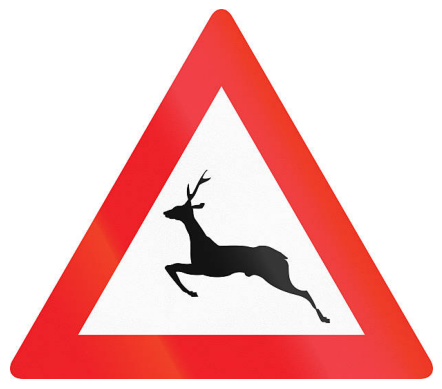

In [ ]:

predictions=(np.argmax(model.predict(img)))
pred = np.round(predictions).astype(int)
plt.imshow(image)
plt.axis('off')

for num, name in data.iteritems():
  name = name.values
  print("predicted sign: "+ str(name[pred]))

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import yfinance as yf
import requests
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.models import Sequential
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random
import pandas as pd
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from skimage import io

data = pd.read_csv('german-traffic-signs/signnames.csv')

def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

new_model = tf.keras.models.load_model('/content/signs.h5')



def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://cdn.pixabay.com/photo/2019/04/24/11/27/flowers-4151900_960_720.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 

st.title("Sign Detection")
url = st.text_input("**Enter a traffic sign here** ", "Start typing here")
if st.button("**Get Result**"):
    r = requests.get(url, stream=True)
    image = Image.open(r.raw)

    img = np.asarray(image)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    imge = img.reshape(1, 32, 32, 1)
    new_model.predict(imge)
    predictions=(np.argmax(new_model.predict(imge)))   
    pred = np.round(predictions).astype(int)
    
  
    fig = make_subplots(rows=1, cols=2 ,shared_yaxes=False)
    fig.add_trace(go.Image(z=image), 1, 1)
    fig.add_trace(go.Heatmap(z=img, colorscale='gray'),1,2).update_yaxes(autorange='reversed',constrain='domain').update_xaxes(constrain='domain')
  
    fig

   
    for num, name in data.iteritems():
      name = name.values
      st.write(f"**predicted sign : {str(name[pred])}**")


Writing app.py


In [ ]:
#https://thumbs.dreamstime.com/b/blue-roundabout-crossroad-road-traffic-sign-against-background-close-105256786.jpg
#https://media.istockphoto.com/id/467751164/photo/wild-animals-crossing-in-austria.jpg?s=612x612&w=0&k=20&c=WjUoo8s21L0zEpHvjuyM_uhdSW9of4HFje-TotmRrzc=
#https://cdn.pixabay.com/photo/2015/08/27/10/45/end-of-speed-limit-910095_1280.png
#https://c8.alamy.com/comp/ARA0HH/keep-left-road-sign-ARA0HH.jpg

In [ ]:
#    fig = px.imshow(image)  
 #   st.plotly_chart(fig,caption='Test') 

 #   fig2 = px.imshow(img)  
 #   st.plotly_chart(fig2,labels ={'x':"Gray scaled image"}) 

In [ ]:
!npm install localtunnel

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.516s
your url is: https://great-phones-drive.loca.lt
